# Data Exploration (10 points):

### Load the "mtcars" dataset and describe its structure, including the number of observations and variables.

### Explore the dataset by calculating summary statistics and visualizing the data. Create scatter plots to examine the relationships between the independent variables and the target variable (mpg).

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sb
from scipy import stats
import numpy as np
data = pd.read_csv('mtcars.csv')

# Load the "mtcars" dataset and describe its structure, including the number of observations and variables.
data.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [48]:
data.shape

(32, 12)

(32, 12) meaning 32 Observations(Rows) and 12 Characteristics(Columns)

In [49]:
# Explore the dataset by calculating summary statistics and visualizing the data. 
data.describe

<bound method NDFrame.describe of                   model   mpg  cyl   disp   hp  drat     wt   qsec  vs  am  \
0             Mazda RX4  21.0    6  160.0  110  3.90  2.620  16.46   0   1   
1         Mazda RX4 Wag  21.0    6  160.0  110  3.90  2.875  17.02   0   1   
2            Datsun 710  22.8    4  108.0   93  3.85  2.320  18.61   1   1   
3        Hornet 4 Drive  21.4    6  258.0  110  3.08  3.215  19.44   1   0   
4     Hornet Sportabout  18.7    8  360.0  175  3.15  3.440  17.02   0   0   
5               Valiant  18.1    6  225.0  105  2.76  3.460  20.22   1   0   
6            Duster 360  14.3    8  360.0  245  3.21  3.570  15.84   0   0   
7             Merc 240D  24.4    4  146.7   62  3.69  3.190  20.00   1   0   
8              Merc 230  22.8    4  140.8   95  3.92  3.150  22.90   1   0   
9              Merc 280  19.2    6  167.6  123  3.92  3.440  18.30   1   0   
10            Merc 280C  17.8    6  167.6  123  3.92  3.440  18.90   1   0   
11           Merc 450SE  16.4 

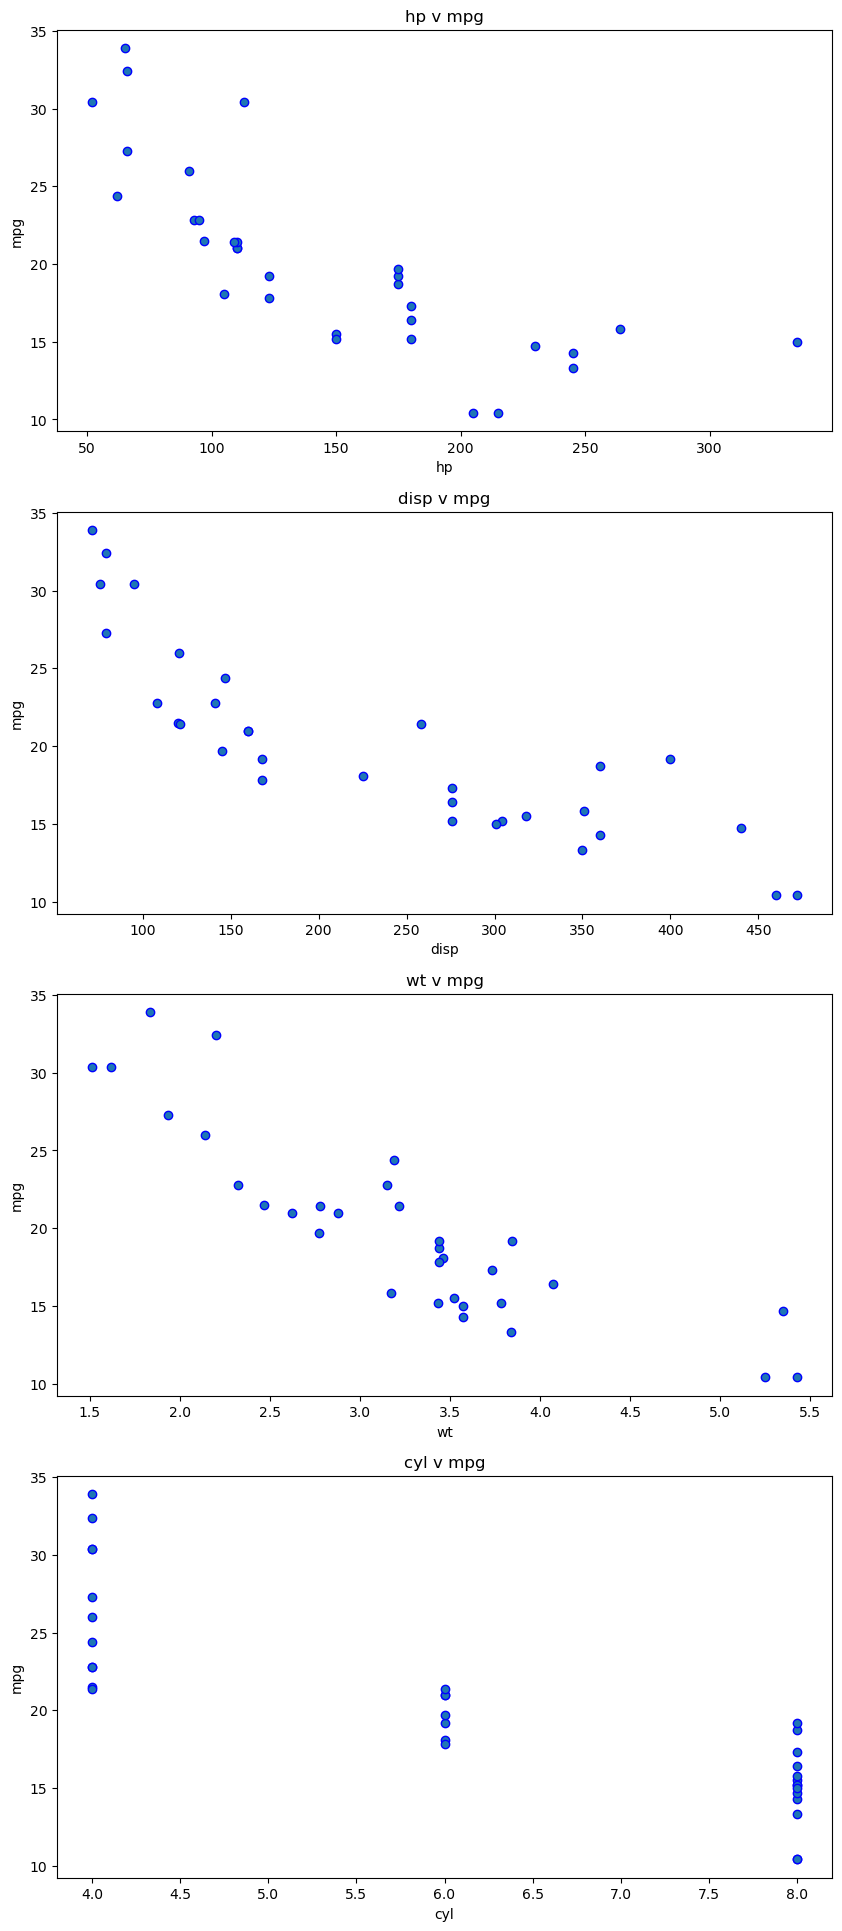

In [50]:
# Create scatter plots to examine the relationships between the independent variables and the target variable (mpg).

variables = ['hp','disp','wt','cyl']

# Create a figure with subplots
fig, axes = plt.subplots(len(variables), 1, figsize=(10, 6*len(variables)))

for i, var in enumerate(variables):
    axes[i].scatter(x=var, y='mpg', data=data, edgecolor='b')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('mpg')
    axes[i].set_title(f'{var} v mpg')

plt.show()

As a result we can see that the lower the HorsePower the higher the MPG as the car isn't burning as much.
We can see a similar pattern with Displacement, Weight and Cylinder count in relation to the MPG

# Simple Linear Regression (30 points):

### Select one independent variable from the "mtcars" dataset that you believe may have a strong linear relationship with the target variable (mpg).

### Implement a simple linear regression model to predict mpg using the selected independent variable.

### Calculate the model's coefficients (slope and intercept) and evaluate its performance using appropriate regression evaluation metrics (on testing dataset).

In [51]:
# Select independent variable (X) and target variable (y)
X = data[['wt']]
y = data['mpg']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Calculate the coefficients (slope and intercept)
slope = model.coef_[0]
intercept = model.intercept_

# Predict the target variable on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the coefficients and evaluation metrics
print(f'Slope (Coefficient): {slope}')
print(f'Intercept: {intercept}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2) Score: {r2}')

Slope (Coefficient): -5.336941400557082
Intercept: 36.93731031351841
Mean Squared Error (MSE): 12.475985659918848
R-squared (R2) Score: 0.6879761857596269


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


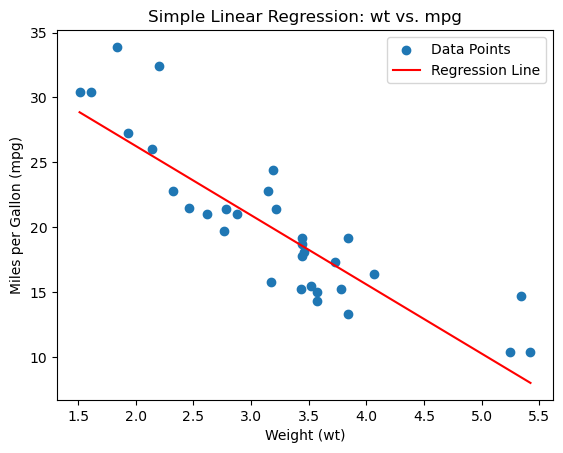

In [52]:
# Points for the regresion line
x_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_range = model.predict(x_range)

# Scatter plot
plt.scatter(X, y, label='Data Points')

# Regression line Plot
plt.plot(x_range, y_range, color='red', label='Regression Line')

# Add labels and legend
plt.xlabel('Weight (wt)')
plt.ylabel('Miles per Gallon (mpg)')
plt.title('Simple Linear Regression: wt vs. mpg')
plt.legend()

# Show plot
plt.show()

# Multiple Linear Regression (40 points):

### Implement a multiple linear regression model using a combination of independent variables from the "mtcars" dataset.

### Train the model to predict mpg using multiple features.

### Evaluate the model's performance using appropriate regression evaluation metrics (on testing dataset).

In [53]:
# Select independent variables (X) and target variable (y)
X = data[['disp', 'hp', 'wt', 'cyl']]  # Using all available features
y = data['mpg']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict the target variable on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2) Score: {r2}')

Mean Squared Error (MSE): 7.18935828323054
R-squared (R2) Score: 0.8201944876643273


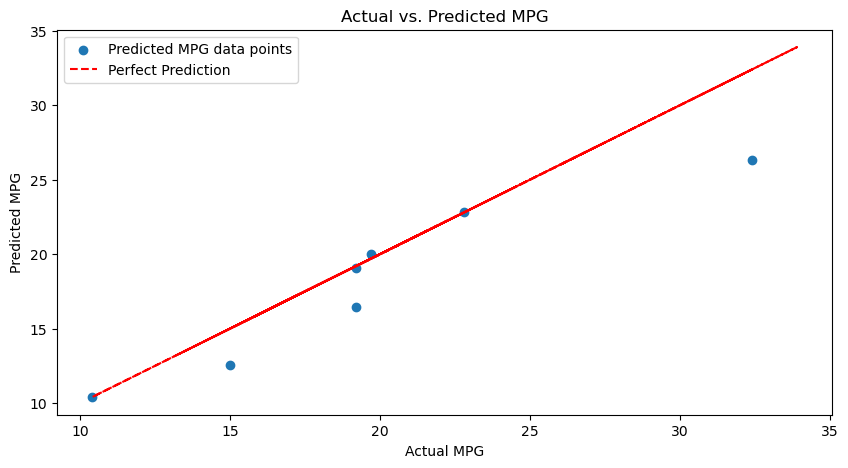

In [56]:
# Plot actual vs. predicted to visualise the predictions made by the mlr model
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, label='Predicted MPG data points')
plt.plot(y, y, color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel("Actual MPG")
plt.ylabel("Predicted MPG")
plt.title("Actual vs. Predicted MPG")
plt.legend()
plt.show()

As we can see the models predictions here are more accurate than the SLR with significantly less outliers

# Discussion and Conclusion 20 points:

### Compare the performance and interpretability of the simple linear regression model with the multiple linear regression model. Discuss the trade-offs between simplicity and complexity.

### Reflect on the insights gained from the assignment and the implications for predicting fuel efficiency in car models.

## Simple Linear Regression (SLR) Results:
### Slope (Coefficient): -5.337
### Intercept: 36.937
### Mean Squared Error (MSE): 12.476
### R-squared (R2) Score: 0.688
## Multiple Linear Regression (MLR) Results:
### Mean Squared Error (MSE): 7.189
### R-squared (R2) Score: 0.820

### Simplicity:
The SLR model is simpler with one independent variable compared to the MLR which is more comples and incomporates multiple independent variables.

### Performance: 
The MLR model outperforms the SLR model in terms of predictive accuracy. It has a lower MSE (7.189 vs. 12.476) and a higher R-squared score (0.820 vs. 0.688). This indicates that the MLR model provides a better fit to the data.

### In Practice:
In practice, if simplicity and interpretability are crucial (e.g., for decision-making in the automotive industry), the SLR model might be preferred. It provides a clear understanding of how weight influences fuel efficiency.
If maximizing predictive accuracy is the primary goal and interpretability is less critical, the MLR model might be chosen.

## Insights and Implications:
### Feature Selection:
The inclusion of additional features (disp, hp, cyl) in the MLR model significantly improves accuracy meaning that considering multiple factors is important for accurately predicting fuel efficiency.

### Model Evaluation:
The MLR model demonstrated superior performance in this case. However, it's crucial to validate its performance on a broader range of data to ensure its generalizability.

### Trade-offs:
The choice between simplicity (SLR) and complexity (MLR) depends on the specific goals and requirements of the problem. Balancing model complexity with interpretability is crucial.

Overall, this analysis highlights the importance of considering model complexity, interpretability, and performance when building predictive models, especially in domains like the automotive industry where accurate predictions are essential for decision-making, advertisements and price predictions.
